# **Motion Magic Studios: Film Analysis**

<img src="https://images.unsplash.com/photo-1598899134739-24c46f58b8c0?auto=format&fit=crop&q=80&w=2912&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="title image" width="700" height="400" />


# Overview

Motion Magic Studios is embarking on an exciting venture into the world of cinema. In this strategic analysis, our goal is to provide valuable insights and recommendations to guide the company in establishing it's new movie studio. Our approach is centered on the study of recent trends in the movie industry, with a particular focus on factors contributing to box office success. Motion Magic Studios can use this analysis to decide what type of films to create. 


# Business Problem

 The main focus for the company is profitability, particularly in the early years. We aim to find the most profitale genre with a mid tier studio budget of $80 million. Additionally, we will investigate the optimal month for movie releases and analyze the correlation between production budget and profitability to inform our strategic decisions.


<img src="https://images.unsplash.com/photo-1543536448-d209d2d13a1c?auto=format&fit=crop&q=80&w=2940&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="film image" width="700" height="400" />


# Data Understanding

The data comes from multiple different film databases and sources - [IMDB](https://www.imdb.com/), [The Numbers](https://www.the-numbers.com/), [Box Office Mojo](https://www.boxofficemojo.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/) and [TheMovieDB](https://www.themoviedb.org/).

For our conditions - we focused on films released between the years 2000-2020, calculated return on investment (ROI) and with a production budget of $80 million or under. 

Some of the limitations of our data include ambiguous data for some observations, financials adjusted for inflation and data integration challenges. 

In [292]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

import sqlite3
import zipfile 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Movie Industry Data
For our master dataset, we identified [The Numbers](https://www.the-numbers.com/) and [IMDB](https://www.imdb.com/) for our analysis. These include information on title, genres, production budget, domestic and worldwide gross.


In [293]:
# Read in movie budgets dataset
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [294]:
# Connect and Read in IMDb SQL tables
conn = sqlite3.connect('im.db.zip')
zip_file_path = 'data/im.db.zip'

with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

database_path = 'unzippedData/im.db'
conn = sqlite3.connect(database_path)

In [295]:
schema_df = pd.read_sql("""

SELECT name
FROM sqlite_master
WHERE type= "table";

""", conn)

schema_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [296]:
# Reading the IMDb movie_basics table
movie_basics = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE start_year <= 2020
    """, conn
)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146013,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146014,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146015,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146016,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [297]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning and Filtering
To prepare our data, we are parsing the release date into new columns and filtering a new dateframe to include the conditions of our business problem and dropping unnecessary columns. 

In [298]:
# Create new columns for release year and release month from release date
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(int)
movie_budgets['release_month'] = movie_budgets['release_date'].str.split().str[0]

In [299]:
# Sanity Check
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [300]:
# Filter for release year equal and above to year 2000
movie_budgets_filtered = movie_budgets[movie_budgets['release_year'] >= 2000]
movie_budgets_filtered 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


Normalizing relevant column names and values

In [301]:
# Remove the dollar sign and commas, then convert the values to integers
movie_budgets_filtered['production_budget'] = movie_budgets_filtered['production_budget'].astype(str)
movie_budgets_filtered['production_budget'] = movie_budgets_filtered['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
movie_budgets_filtered['worldwide_gross'] = movie_budgets_filtered['worldwide_gross'].astype(str)
movie_budgets_filtered['worldwide_gross'] = movie_budgets_filtered['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)
movie_budgets_filtered['domestic_gross'] = movie_budgets_filtered['domestic_gross'].astype(str)
movie_budgets_filtered['domestic_gross'] = movie_budgets_filtered['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

In [302]:
# Sanity Check
movie_budgets_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015,Sep


# Feature Engineering

In [303]:
# Create profit column
movie_budgets_filtered['profit'] = movie_budgets_filtered['worldwide_gross'] - movie_budgets_filtered['production_budget']
movie_budgets_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec,999721747
...,...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,2004,Dec,-6100
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,Dec,-7000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,Jul,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015,Sep,-1400


In [304]:
# Create return on investment (ROI) column 
movie_budgets_filtered['roi'] = round((movie_budgets_filtered['profit'] / movie_budgets_filtered['production_budget']) * 100, 2)
movie_budgets_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec,2351345279,553.26
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May,635063875,154.67
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun,-200237650,-57.21
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,1072413963,324.38
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec,999721747,315.37
...,...,...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,2004,Dec,-6100,-87.14
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,Dec,-7000,-100.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,Jul,-3662,-73.24
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015,Sep,-1400,-100.00


In [305]:
movie_budgets_filtered['roi'].describe()

count     4387.000000
mean       236.031814
std       1263.118508
min       -100.000000
25%        -59.755000
50%         54.470000
75%        240.275000
max      43051.790000
Name: roi, dtype: float64

In [306]:
# Filtering roi above 200.0
movie_budgets_filtered = movie_budgets_filtered[movie_budgets_filtered["roi"] >= 200.0]
movie_budgets_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec,2351345279,553.26
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,1072413963,324.38
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec,999721747,315.37
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,Dec,1747311220,571.02
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,Apr,1748134200,582.71
...,...,...,...,...,...,...,...,...,...,...
5766,67,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,128711,1287.11
5767,68,"Jul 6, 2001",Cure,10000,94596,94596,2001,Jul,84596,845.96
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,2004,Oct,834926,11927.51
5775,76,"May 26, 2006",Cavite,7000,70071,71644,2006,May,64644,923.49


In [307]:
# Filter observations where the production_budget is less than or equal to $80M
budgets = movie_budgets_filtered[movie_budgets_filtered['production_budget'] <= 80000000]
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi
537,38,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,597923379,747.40
538,39,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,506464305,633.08
540,41,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,230660018,288.33
541,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,389500298,486.88
544,45,"May 19, 2006",Over the Hedge,80000000,155019340,343397247,2006,May,263397247,329.25
...,...,...,...,...,...,...,...,...,...,...
5766,67,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,128711,1287.11
5767,68,"Jul 6, 2001",Cure,10000,94596,94596,2001,Jul,84596,845.96
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,2004,Oct,834926,11927.51
5775,76,"May 26, 2006",Cavite,7000,70071,71644,2006,May,64644,923.49


In [308]:
# Sanity check
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 537 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1058 non-null   int64  
 1   release_date       1058 non-null   object 
 2   movie              1058 non-null   object 
 3   production_budget  1058 non-null   int64  
 4   domestic_gross     1058 non-null   int64  
 5   worldwide_gross    1058 non-null   int64  
 6   release_year       1058 non-null   int64  
 7   release_month      1058 non-null   object 
 8   profit             1058 non-null   int64  
 9   roi                1058 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 90.9+ KB


In [309]:
# Create new dataframe and Merge with IMDB movie_basics table
merged_df_copy = pd.merge(budgets, movie_basics, left_on='movie', right_on='primary_title', how='inner')
merged_df_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,597923379,747.40,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,506464305,633.08,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,230660018,288.33,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,389500298,486.88,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,133668525,247023808,2013,Jul,167023808,208.78,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,49,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,464792,1859.17,tt2782686,Exeter,Exeter,2014,NaN,Horror
770,49,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,464792,1859.17,tt4931374,Exeter,Exeter,2015,92.0,None
771,67,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,128711,1287.11,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"
772,68,"Jul 6, 2001",Cure,10000,94596,94596,2001,Jul,84596,845.96,tt1872026,Cure,Cure,2011,93.0,Drama


In [310]:
# Drop duplicates from new dataframe
merge_copy = merged_df_copy.drop_duplicates(subset=['movie'])
merge_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,38,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,597923379,747.40,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi"
1,39,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,506464305,633.08,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery"
2,41,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,230660018,288.33,tt4116284,The Lego Batman Movie,The Lego Batman Movie,2017,104.0,"Action,Animation,Comedy"
3,42,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,389500298,486.88,tt2510894,Hotel Transylvania 2,Hotel Transylvania 2,2015,89.0,"Animation,Comedy,Family"
4,48,"Jul 12, 2013",Grown Ups 2,80000000,133668525,247023808,2013,Jul,167023808,208.78,tt2191701,Grown Ups 2,Grown Ups 2,2013,101.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,38,"Mar 18, 2016",Krisha,30000,144822,144822,2016,Mar,114822,382.74,tt4266638,Krisha,Krisha,2015,83.0,Drama
767,48,"Jan 14, 2000",The Terrorist,25000,195043,195043,2000,Jan,170043,680.17,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller
768,49,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,464792,1859.17,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller"
771,67,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,128711,1287.11,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"


In [311]:
# Dropping unnecessary columns
merge_copy.drop(columns = ["id", "start_year", "original_title", "runtime_minutes"], inplace = True)

In [312]:
# Rename the dataframe to appropriate name and save cleaned dataset as CSV
movie_df = merge_copy
movie_df.to_csv('data/movie.df.csv', index=False)

In [313]:
# Sanity check
movie_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi,movie_id,primary_title,genres
0,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,597923379,747.40,tt1392170,The Hunger Games,"Action,Adventure,Sci-Fi"
1,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,506464305,633.08,tt1411697,The Hangover Part II,"Comedy,Mystery"
2,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,230660018,288.33,tt4116284,The Lego Batman Movie,"Action,Animation,Comedy"
3,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,389500298,486.88,tt2510894,Hotel Transylvania 2,"Animation,Comedy,Family"
4,"Jul 12, 2013",Grown Ups 2,80000000,133668525,247023808,2013,Jul,167023808,208.78,tt2191701,Grown Ups 2,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
766,"Mar 18, 2016",Krisha,30000,144822,144822,2016,Mar,114822,382.74,tt4266638,Krisha,Drama
767,"Jan 14, 2000",The Terrorist,25000,195043,195043,2000,Jan,170043,680.17,tt9248762,The Terrorist,Thriller
768,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,464792,1859.17,tt1945044,Exeter,"Horror,Mystery,Thriller"
771,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,128711,1287.11,tt6619196,Clean,"Comedy,Drama,Horror"


In [314]:
movie_df["genres"].value_counts()

genres
Drama                         36
Horror,Mystery,Thriller       25
Comedy,Drama,Romance          24
Comedy,Drama                  21
Documentary                   21
                              ..
Action,Adventure,Horror        1
Action,Adventure,Biography     1
Crime,Drama,Family             1
Adventure,Family,Sci-Fi        1
Comedy,Drama,Horror            1
Name: count, Length: 141, dtype: int64

# Visual Analysis

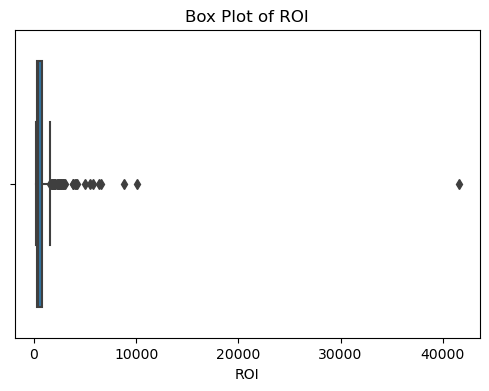

In [315]:
# Using box plot to see any outliers

fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x=movie_df['roi'], ax=ax)
ax.set_title('Box Plot of ROI')
ax.set_xlabel('ROI')
plt.show()

In [316]:
# Addressing the outlier
max_value = movie_df['roi'].max()
movie_df = movie_df[movie_df['roi'] != max_value]

In [317]:
# Sanity Check
movie_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi,movie_id,primary_title,genres
0,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,597923379,747.40,tt1392170,The Hunger Games,"Action,Adventure,Sci-Fi"
1,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,506464305,633.08,tt1411697,The Hangover Part II,"Comedy,Mystery"
2,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,230660018,288.33,tt4116284,The Lego Batman Movie,"Action,Animation,Comedy"
3,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,389500298,486.88,tt2510894,Hotel Transylvania 2,"Animation,Comedy,Family"
4,"Jul 12, 2013",Grown Ups 2,80000000,133668525,247023808,2013,Jul,167023808,208.78,tt2191701,Grown Ups 2,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
766,"Mar 18, 2016",Krisha,30000,144822,144822,2016,Mar,114822,382.74,tt4266638,Krisha,Drama
767,"Jan 14, 2000",The Terrorist,25000,195043,195043,2000,Jan,170043,680.17,tt9248762,The Terrorist,Thriller
768,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,464792,1859.17,tt1945044,Exeter,"Horror,Mystery,Thriller"
771,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,128711,1287.11,tt6619196,Clean,"Comedy,Drama,Horror"


First, we focus on different genres and compare the ROI impact they had. We are looking to make movies with a budget of $80M, so the movies that fall under the "Horror, Mystery, Thriller" genre and Drama stand out. 

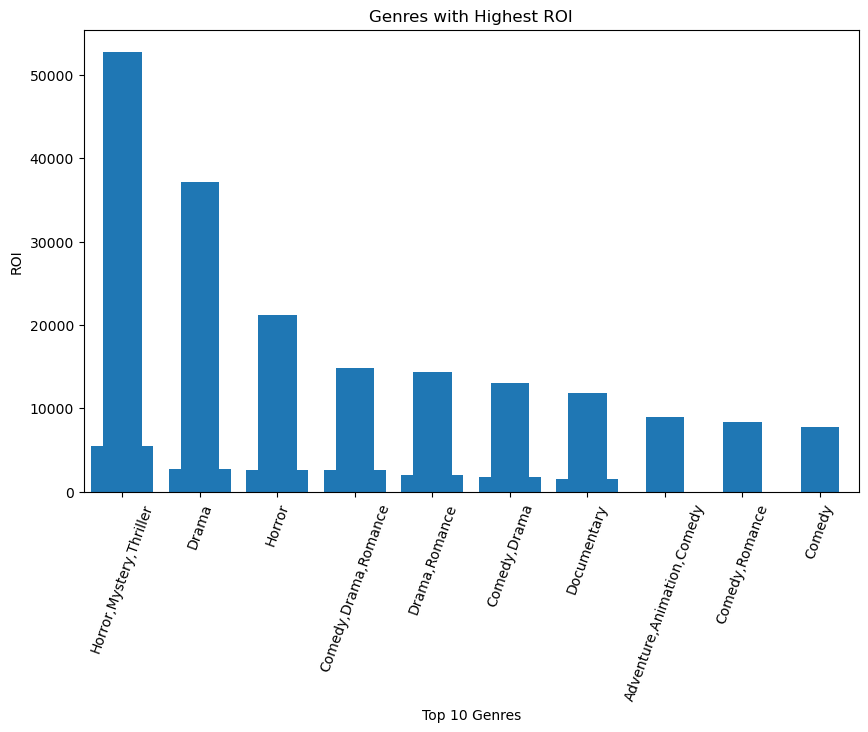

In [318]:
# Bar chart for top 10 genres
plt.figure(figsize=(10, 6))
top_10_genre = movie_df.groupby("genres")["roi"].sum().sort_values(ascending = False).head(10)
top_10_genre.plot(kind = "bar")
top_genre_highest_roi = movie_df.groupby('genres')['roi'].median().sort_values(ascending=False).head(7)
plt.bar(top_genre_highest_roi.index, top_genre_highest_roi.values)
plt.xlabel('Top 10 Genres')
plt.ylabel('ROI')
plt.title('Genres with Highest ROI')
plt.xticks(rotation=70)
plt.show()

Next we looked at which month had the highest profit. June and July are the most profitable. 

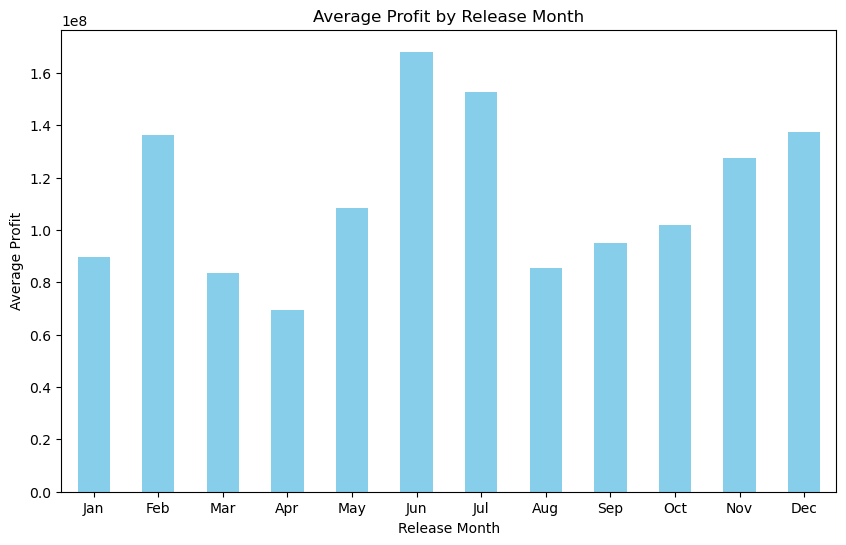

In [319]:
# Bar chart for Profit across release months
profit_month = movie_df.groupby('release_month')['profit'].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a bar plot
plt.figure(figsize=(10, 6))
profit_month.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')
plt.xticks(rotation=0)
plt.show()

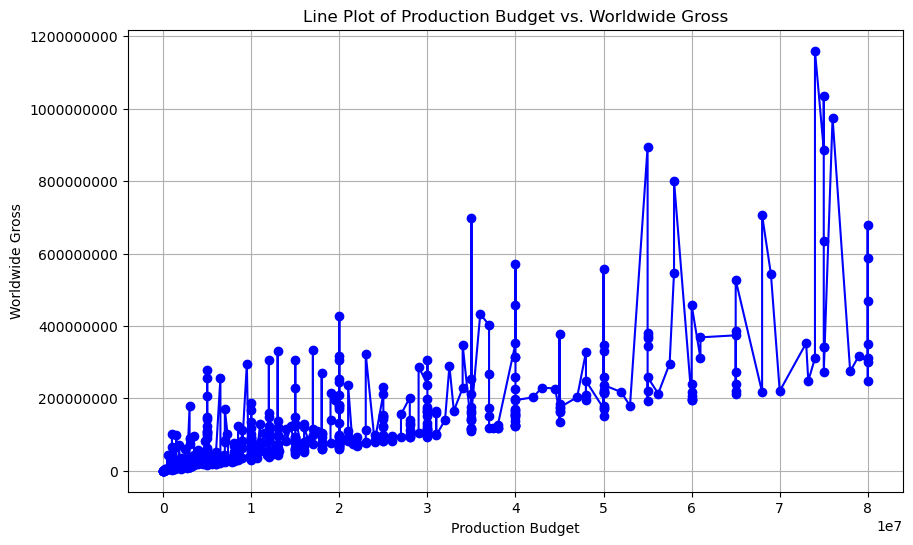

In [320]:
roi_sorted = movie_df.sort_values(by='production_budget')

# Extract the data
production_budget = roi_sorted['production_budget']
worldwide_gross = roi_sorted['worldwide_gross']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(production_budget, worldwide_gross, color='blue', marker='o', linestyle='-')
plt.title('Line Plot of Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Format the y-axis labels to display full numbers, not in scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Production budget and worldwide gross')

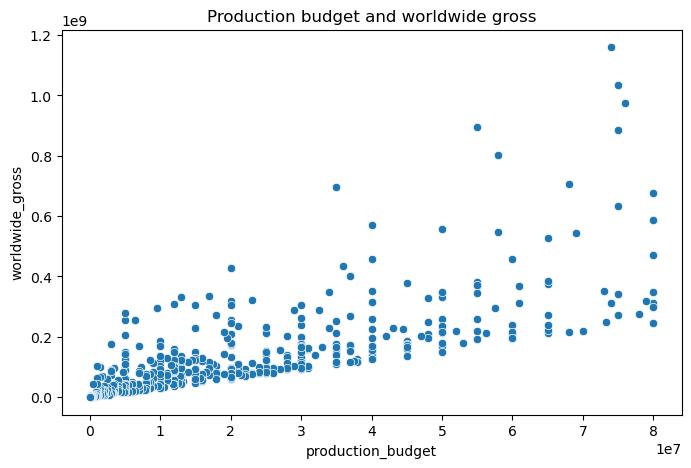

In [321]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=movie_df['production_budget'], y=movie_df["worldwide_gross"])
ax.set_title("Production budget and worldwide gross")



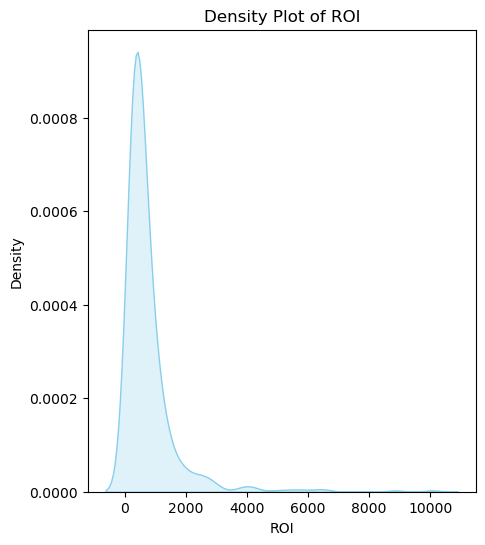

In [322]:
plt.figure(figsize=(5, 6))
sns.kdeplot(movie_df['roi'], color='skyblue', shade=True)
plt.title('Density Plot of ROI')
plt.xlabel('ROI')
plt.ylabel('Density')
plt.show()

In [323]:
# Calculate central tendency measures - mean, median, mode
movie_df['roi'].describe()

count      513.000000
mean       751.409688
std        968.504370
min        200.860000
25%        288.050000
50%        445.120000
75%        806.890000
max      10075.950000
Name: roi, dtype: float64

# Hypothesis Testing

In [324]:
# Correlation Coefficient to see relation between production_budget and profit

corr_coeff = np.corrcoef(movie_df['production_budget'], movie_df['profit'])[0, 1]
print(f"Pearson's correlation coefficient: {corr_coeff:.2f}")

Pearson's correlation coefficient: 0.67


Hypothesis Test between production_budget and ROI.

HA: There is a significant difference to budget and ROI.

H0: There is no difference to budget and ROI.

A value closer to 1 implies a strong positive correlation.
A value closer to -1 implies a strong negative correlation.
A value closer to 0 implies little to no correlation.

In [325]:
hypothesis_mean = 0

# Select the column containing the 'roi' values and compute the sample mean
sample_data = movie_df['roi']
sample_mean = sample_data.mean()

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, hypothesis_mean)

# Output the results
print(f"Sample Mean: {sample_mean}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for significance
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Sample Mean: 751.4096881091618
T-Statistic: 17.572513596213923
P-Value: 1.9375440419141796e-54
Reject the null hypothesis


In [326]:
hypothesis_mean = 0

# Select the column containing the netprofit values and compute the sample mean
sample_data = movie_df['profit']
sample_mean = sample_data.mean()

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, hypothesis_mean)

# Output the results
print(f"Sample Mean: {sample_mean}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for significance
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Sample Mean: 113519763.81871346
T-Statistic: 19.047082111966354
P-Value: 1.5226398203288797e-61
Reject the null hypothesis


# Linear Regression

First, we want to look at how movie budgets affect profits for our entire data set. Not surprisingly, the R-value of .66 shows some positive correlation between spending money on a movie and earning profits.

In [327]:
# Simple linear regression for all movies
slope, intercept, r_value, p_value, std_err = linregress(movie_df["production_budget"], movie_df["profit"])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

Slope: 4.419406444734588
Intercept: 16710944.07692881
R-value: 0.6691813266121204
P-value: 6.696275641458689e-68
Standard Error: 0.21709831249904837


In [328]:
# Simple Linear Regression budget vs profit
X = movie_df['production_budget']
y = movie_df['profit']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     414.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           6.70e-68
Time:                        19:25:57   Log-Likelihood:                -10179.
No. Observations:                 513   AIC:                         2.036e+04
Df Residuals:                     511   BIC:                         2.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.671e+07    6.5e+06      2.570      0.010    3.94e+06    2.95e+07
production_budget     4.4194      0.217     20.357      0.000       3.993       4.846
==============================================================================
Omnibus:                      364.120   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5141.560
Skew:                           2.980   Prob(JB):                         0.00
Kurtosis:                      17.318   Cond. No.                     4.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

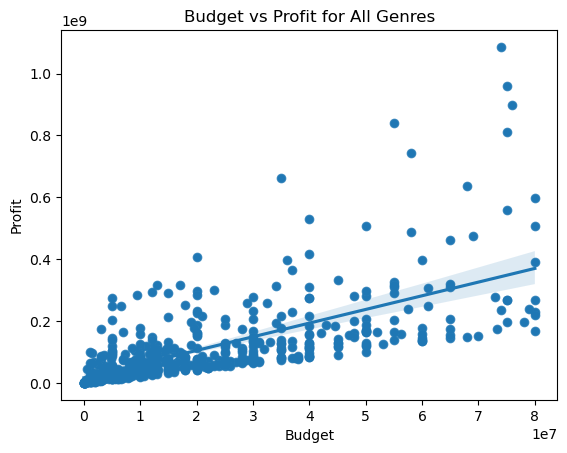

In [329]:
# Plotting the best fit line

sns.scatterplot(x='production_budget', y='profit', data=movie_df)
sns.regplot(data = movie_df, x = "production_budget", y = "profit")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.title("Budget vs Profit for All Genres")
plt.show()


Next we looked at how production budget affects worldwide gross. As expected the R-value of 0.74 shows positive correlation between an increase in budget yielding in inrease in higher worldwide gross. 

In [330]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(movie_df["production_budget"], movie_df["worldwide_gross"])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

Slope: 5.4194064447345855
Intercept: 16710944.076928854
R-value: 0.7412429738729985
P-value: 1.6232317228375647e-90
Standard Error: 0.21709831249904826


In [331]:
# Simple Linear Regression
X = movie_df['production_budget']
y = movie_df['worldwide_gross']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     623.1
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.62e-90
Time:                        19:25:57   Log-Likelihood:                -10179.
No. Observations:                 513   AIC:                         2.036e+04
Df Residuals:                     511   BIC:                         2.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.671e+07    6.5e+06      2.570      0.010    3.94e+06    2.95e+07
production_budget     5.4194      0.217     24.963      0.000       4.993       5.846
==============================================================================
Omnibus:                      364.120   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5141.560
Skew:                           2.980   Prob(JB):                         0.00
Kurtosis:                      17.318   Cond. No.                     4.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

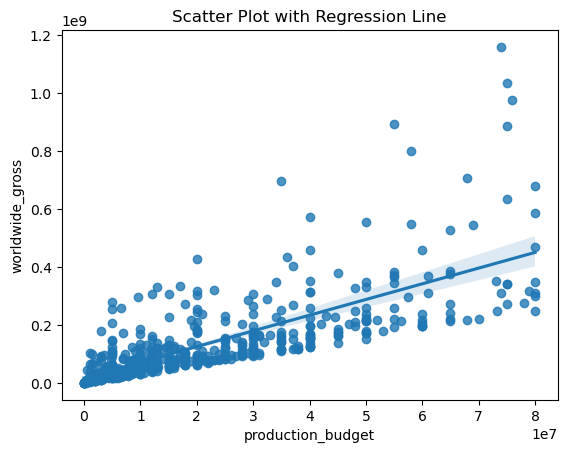

In [332]:
# Scatter plot with regression line
sns.regplot(x='production_budget', y='worldwide_gross', data=movie_df)
plt.title('Scatter Plot with Regression Line')
plt.show()

In [333]:
# Simple Linear Regression
X = movie_df['production_budget']
y = movie_df['roi']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     36.60
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.81e-09
Time:                        19:25:57   Log-Likelihood:                -4236.9
No. Observations:                 513   AIC:                             8478.
Df Residuals:                     511   BIC:                             8486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1019.7470     60.638     16.817      0.000     900.617    1138.877
production_budget -1.225e-05   2.02e-06     -6.050      0.000   -1.62e-05   -8.27e-06
==============================================================================
Omnibus:                      542.407   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25475.176
Skew:                           4.846   Prob(JB):                         0.00
Kurtosis:                      36.134   Cond. No.                     4.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

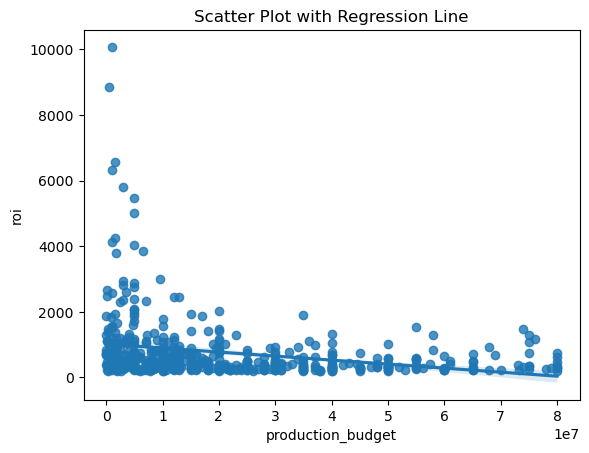

In [334]:
# Scatter plot with regression line
sns.regplot(x='production_budget', y='roi', data=movie_df)
plt.title('Scatter Plot with Regression Line')
plt.show()